# Data preparation with Datumaro

Datumaro is the open-source data management framework for computer vision and , making easy to import and export along with desired formats. Specifically, Datumaro provides more than 50 public data formats, e.g., MS-COCO, Pascal-VOC, YOLO-Ultralytics, Roboflow, CVAT, Cityscapes, etc. Please refer here for the details.

Moreover, Datumaro provides data manipulation functionalities such as filtration, transformation, subset appregation/split. Plus, data visualization and exploration are possible with Datumaro! Please enjoy basic/intermediate/advanced skills at here.

We here provide an example to import Corona NLP dataset and convert this to PyTorch dataset directly. After that, we can easily run training and validation for conventional text classification task on PyTorch framework.

## Install Datumaro package

<!-- !pip install datumaro==1.7.0 -->

## Import a dataset

The dataset is organized in the following directory structure:

```
.
├── Corona_NLP_test.csv
└── Corona_NLP_train.csv
```

In our `corona_nlp` folder, we've got two CSV files: `Corona_NLP_train.csv` and `Corona_NLP_test.csv`. These files hold the training and testing data for our Corona NLP dataset. I used `datumaro` to inspect the dataset directory structure, and it appears that the dataset is in tabular format.

In [1]:
import datumaro as dm
from datumaro.components.environment import DEFAULT_ENVIRONMENT

data_path = "/home/sooah/data/corona_nlp"
detected_formats = DEFAULT_ENVIRONMENT.detect_dataset(data_path)
detected_formats

['tabular']

To load our dataset using Datumaro, we'll need to specify the encoding as 'latin1' since the dataset is encoded in that format. We'll need to include `import_kwargs` to handle this:

In [2]:
import_kwargs = {"encoding": "latin1"}
dm_dataset = dm.Dataset.import_from(data_path, detected_formats[0], **import_kwargs)
dm_dataset

Dataset
	size=44955
	source_path=/home/sooah/data/corona_nlp
	media_type=<class 'datumaro.components.media.TableRow'>
	ann_types=set()
	annotated_items_count=0
	annotations_count=0
subsets
	Corona_NLP_test: # of items=3798, # of annotated items=0, # of annotations=0
	Corona_NLP_train: # of items=41157, # of annotated items=0, # of annotations=0
infos
	categories
	tabular: []

Based on the information provided,
- The total size of the dataset is 44955 items.
- The dataset is divided into two subsets:
  - The 'Corona_NLP_test' subset contains 3798 items.
  - The 'Corona_NLP_train' subset contains 41157 items.

This breakdown gives us insight into the scale of our dataset and the distribution of items across its subsets.

### Setting Input and Output Targets for Sentiment Analysis

Moreover, we tried to take sentiment analysis for this dataset, so we have to set input and output targets for the dataset.

**For Input (Features)**:
- **Original Tweet**: This field contains the content of each tweet. When performing sentiment analysis, text data is used as the input for the model. Each tweet's content is tokenized, preprocessed, and then provided to the model.
- **Location (Optional)**: This field represents the location of the user who posted the tweet. Some models can utilize location information as additional features to enhance performance. However, the use of this field is optional and depends on the model.

**For Output (Target)**:
- **Sentiment**: This field indicates the sentiment of each tweet. The goal of sentiment analysis is to classify the sentiment of text, making this field the output target for the model. Sentiments are typically classified as positive, negative, or neutral, and the model aims to predict them.

Therefore, for the input of the sentiment analysis model, we will use the 'OriginalTweet' field to represent the content of each tweet. For the output, we will use the 'Sentiment' field to represent the sentiment of each tweet. The 'Location' field is optional and may or may not be used, depending on the model.


In [18]:
corona_nlp_target = {"input": ["OriginalTweet", "Location"], "output": "Sentiment"}
dm_dataset = dm.Dataset.import_from(
    data_path, detected_formats[0], target=corona_nlp_target, **import_kwargs
)
dm_dataset

Dataset
	size=44955
	source_path=/home/sooah/data/corona_nlp
	media_type=<class 'datumaro.components.media.TableRow'>
	ann_types={<AnnotationType.tabular: 14>}
	annotated_items_count=44955
	annotations_count=44955
subsets
	Corona_NLP_test: # of items=3798, # of annotated items=3798, # of annotations=3798
	Corona_NLP_train: # of items=41157, # of annotated items=41157, # of annotations=41157
infos
	categories
	tabular: ['Sentiment']

It's worth noting that each item in the dataset now includes annotations for the output target we've defined. This means that the dataset has been updated to include annotations corresponding to the target output we've set.

By having annotations for the output target, we can track and utilize the labeled sentiment information associated with each data item. This update enhances the dataset's utility for sentiment analysis tasks, allowing for more effective model training and evaluation.


Now, let's take a peek at the first item in our dataset.

In [19]:
dm_dataset.__getitem__(0)

DatasetItem(id='0@Corona_NLP_train', subset='Corona_NLP_train', media=TableRow(row_idx:0, data:{'OriginalTweet': '@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8', 'Location': 'London', 'Sentiment': 'Neutral'}), annotations=[Tabular(id=0, attributes={}, group=0, object_id=-1, values={'Sentiment': 'Neutral'})], attributes={})

To check the media of the DatasetItem, we can check like below:

In [20]:
print("media : ", dm_dataset.__getitem__(0).media.data())
print("annotations : ", dm_dataset.__getitem__(0).annotations)

media :  {'OriginalTweet': '@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8', 'Location': 'London', 'Sentiment': 'Neutral'}
annotations :  [Tabular(id=0, attributes={}, group=0, object_id=-1, values={'Sentiment': 'Neutral'})]


We can confirm that the columns we've designated as output targets are present in the dataset's media. Furthermore, the output targets are stored as annotations within the data.

This indicates that the dataset has been structured to include the designated `target` columns in the `media`, and the `output` target information is available as `annotations` associated with each data item.


### Transforming Dataset Annotations for Sentiment Analysis Task

Our objective is to prepare the dataset for sentiment analysis, where sentiment serves as the label. To achieve this, we'll update the annotation type of the dataset items. The current annotation type of 'Tabular' is not ideal for sentiment analysis. Hence, we'll transform the dataset to better suit our task.

This transformation step is crucial to ensure that our dataset is properly formatted and ready for sentiment analysis model training and evaluation.


In [21]:
dm_dataset = dm_dataset.transform("astype_annotations")
dm_dataset

Dataset
	size=44955
	source_path=/home/sooah/data/corona_nlp
	media_type=<class 'datumaro.components.media.TableRow'>
	ann_types={<AnnotationType.label: 1>}
	annotated_items_count=44955
	annotations_count=44955
subsets
	Corona_NLP_test: # of items=3798, # of annotated items=3798, # of annotations=3798
	Corona_NLP_train: # of items=41157, # of annotated items=41157, # of annotations=41157
infos
	categories
	label: ['Sentiment:Extremely Negative', 'Sentiment:Extremely Positive', 'Sentiment:Negative', 'Sentiment:Neutral', 'Sentiment:Positive']

In [22]:
print("annotations : ", dm_dataset.__getitem__(0).annotations)

annotations :  [Label(id=0, attributes={}, group=0, object_id=-1, label=3)]


We can observe that the sentiment labels have been included in the dataset categories, indicating the presence of sentiment-related labels. This inclusion is crucial as it allows us to understand the categories or classes that the dataset encompasses, particularly in terms of sentiment analysis.

Furthermore, we can confirm that these sentiment labels are reflected in the annotations of each dataset item. This ensures that the sentiment information associated with each item has been appropriately integrated into the dataset, laying the groundwork for sentiment analysis tasks.


### Exploring Dataset Characteristics

Having transformed the data as described above, we'll now explore the characteristics of the dataset. To begin, we'll use Datumaro's Validator to understand various features and attributes of the dataset.

Using the Validator, we can:
- Determine the number of columns included in the dataset and identify the type of each feature.
- Check for missing values or outliers, thereby understanding the dataset's structure.
- Analyze the distribution of the target variable to identify any class imbalance issues.
- Calculate basic statistical measures to understand the central tendency and dispersion of the data.

If you want to learn more about the conditions set in the Validator, please check [this link](https://openvinotoolkit.github.io/datumaro/latest/docs/level-up/intermediate_skills/08_data_validate.html).

This step will help us gain insights into the structure and properties of our data, setting the stage for effective analysis and modeling.

In [23]:
from datumaro.plugins.validators import TabularValidator

validator = TabularValidator(
    few_samples_thr=1,
    imbalance_ratio_thr=50,
    far_from_mean_thr=5.0,
    dominance_ratio_thr=0.8,
    topk_bins=0.1,
)
stats = validator.compute_statistics(dm_dataset)

### Dataset Statistics

The dataset statistics are as follows:

- **Total number of annotations**: This represents the total number of annotations present in the dataset.
- **Number of items with no annotations**: This indicates the number of items that do not have any annotations.
- **Number of items with some missing annotations**: This shows the number of items that are missing some of their annotations.

In Datumaro, annotations are categorized based on their characteristics, such as labels or captions, and their distribution can be analyzed accordingly. For this dataset, since we have set sentiment as the target, only label annotations are present.


Statistics summary
Total number of annotation :  44955
The number of items without any annotation :  0
The number of items with missing annotation :  0


Result of label distribution
   Sentiment:Extremely Negative  Sentiment:Extremely Positive  \
0                          6073                          7223   

   Sentiment:Negative  Sentiment:Neutral  Sentiment:Positive  
0               10958               8332               12369  
The number of empty label for Sentiment is 0




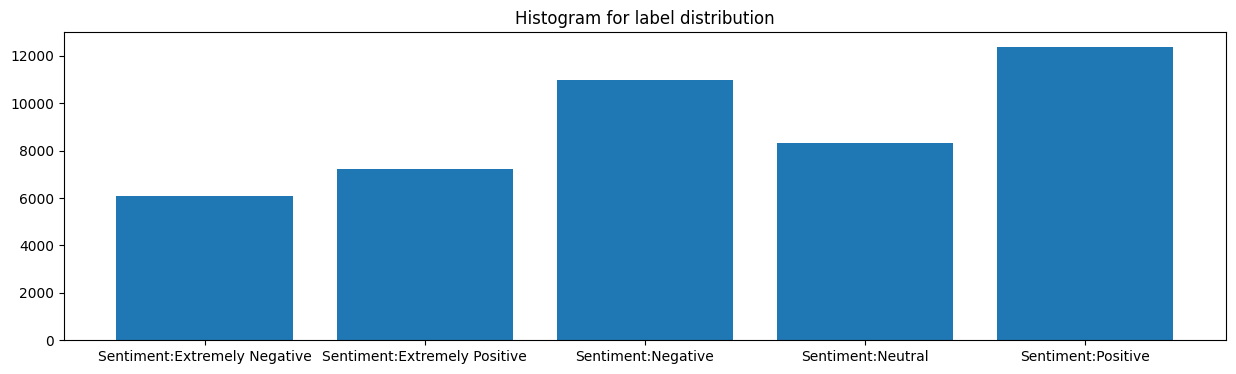

In [24]:
import pandas as pd
import matplotlib.pyplot as plt


def show_stats(stats):
    print("Statistics summary")

    total_ann_count = stats["total_ann_count"]
    len_missing_ann_items = len(stats["items_missing_annotation"])
    len_broken_ann_items = len(stats["items_broken_annotation"])
    print("Total number of annotation : ", total_ann_count)
    print("The number of items without any annotation : ", len_missing_ann_items)
    print("The number of items with missing annotation : ", len_broken_ann_items)
    print("\n")

    defined_labels = stats["label_distribution"]["defined_labels"]
    if len(defined_labels) != 0:
        print("Result of label distribution")
        df_defined_labels = pd.DataFrame.from_dict([defined_labels])
        print(df_defined_labels)
        for key, value in stats["label_distribution"]["empty_labels"].items():
            print(f"The number of empty label for {key} is {value['count']}")
    plt.figure(figsize=(15, 4))
    plt.title("Histogram for label distribution")
    plt.bar(defined_labels.keys(), defined_labels.values())

    print("\n")
    defined_captions = stats["caption_distribution"]["defined_captions"]
    if len(defined_captions) != 0:
        print("Result of caption distribution")
        df_defined_captions = pd.DataFrame.from_dict([defined_captions])
        print(df_defined_captions)
        for key, value in stats["caption_distribution"]["empty_captions"].items():
            print(f"The number of empty caption for {key} is {value['count']}")
    return


show_stats(stats)

We can observe that the distribution among classes is uneven, with the 'positive' class having the largest proportion. This detailed statistical overview helps us understand the composition and completeness of the dataset, guiding further analysis and preprocessing steps.

Since this dataset has no empty labels, items with missing annotations, or items with broken annotations, the focus should be on cleaning the input data rather than the labels.

In [25]:
dm_dataset.__getitem__(0).media.data()

{'OriginalTweet': '@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8',
 'Location': 'London',
 'Sentiment': 'Neutral'}

In [26]:
dm_dataset.__getitem__(100).media.data()

{'OriginalTweet': 'I hate grocery shopping in general but I swear IÂ\x92m doing it online next shop, can not deal with the swathes of panic buyers at all! #COVID?19 #coronavirus #coronavirusuk #anxiety #panicbuyinguk #morons',
 'Location': 'Portsmouth, England',
 'Sentiment': 'Extremely Negative'}

Datumaro provides a transform called `clean` that can be used for data cleaning. This transform helps in preparing the dataset for analysis by addressing various data quality issues. The `clean` transform modifies the media of items without validation and simultaneously cleans the annotations. If you want to clean the input media, it is recommended to use the `clean` function.

In our case, since the dataset does not have any empty labels, items with missing annotations, or items with broken annotations, we will focus on cleaning the input data. Using the `clean` transform, we can ensure that the input information is properly formatted and free from inconsistencies.

This step is crucial to maintain the quality and integrity of the data, which in turn, enhances the performance of the sentiment analysis model.

In [11]:
result = dm_dataset.transform("clean")

In [16]:
result.__getitem__(0).media.data

{'OriginalTweet': 'menyrbie philgahan chrisitv',
 'Location': 'london',
 'Sentiment': 'Neutral'}

In [27]:
result.__getitem__(100).media.data

{'OriginalTweet': 'hate grocery shopping general swear im online next shop deal swathes panic buyers covid coronavirus coronavirusuk anxiety panicbuyinguk morons',
 'Location': 'portsmouth england',
 'Sentiment': 'Extremely Negative'}

We can observe that the existing input media have been refined. If the same target is included in both the input and the output, the annotations will also be updated accordingly.

This notebook will be moved to Kaggle notebook after Datumaro 1.8 release